# Exploratory Analysis

The following notebbok covers Exploratory Data Analysis (EDA) of the provided dataset. <br>
Language : Python <br>
Kernel : Conda Python 3 
<br>
Various inferences can be drawn using suppporting visualisations of the datasets. The notebook also contains correlation analysis, feature engineering, and a linear regression model to examine the variable importance & check multicollinearity, hetroscedasticity in the dataset. Kindly note, <b> This notebook doesn't contain the final model code. the code can be found in a separate R file. </b>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("training_obl.csv")
df.head()

,id,Area(total),Nbedrooms,Nwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,Price
0,1,339,4,5,147,62,5,95,3,1,2996
1,2,206,7,6,133,93,1,87,6,1,19918
2,3,323,3,3,145,57,4,76,5,2,1835
3,4,357,6,2,72,96,5,68,6,5,13432
4,5,320,4,7,108,90,3,61,4,3,4584


In [12]:
df.shape

(900, 11)

In [5]:
df.describe()

,id,Area(total),Nbedrooms,Nwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,Price
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000
mean,450.500000,302.470000,4.447778,3.984444,99.773333,75.481111,3.100000,76.382222,3.511111,3.04000,7384.633333
std,259.951919,57.465182,1.705369,1.996042,29.190254,14.542435,1.421666,10.394152,1.726225,1.41522,6111.214287
min,1.000000,200.000000,2.000000,1.000000,50.000000,50.000000,1.000000,60.000000,1.000000,1.00000,549.000000
25%,225.750000,252.750000,3.000000,2.000000,74.000000,62.750000,2.000000,68.000000,2.000000,2.00000,2870.750000
50%,450.500000,304.000000,4.000000,4.000000,99.000000,75.000000,3.000000,75.000000,4.000000,3.00000,5066.000000
75%,675.250000,352.000000,6.000000,6.000000,124.250000,88.000000,4.000000,86.000000,5.000000,4.00000,9934.250000
max,900.000000,400.000000,7.000000,7.000000,150.000000,100.000000,5.000000,95.000000,6.000000,5.00000,24851.000000


In [18]:
df.dtypes

id             int64
Area(total)    int64
Nbedrooms      int64
Nwashrooms     int64
Roof(Area)     int64
Lawn(Area)     int64
Nfloors        int64
API            int64
ANB            int64
Grade          int64
Price          int64
dtype: object

In [11]:
df.isnull().sum()

id             0
Area(total)    0
Nbedrooms      0
Nwashrooms     0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
Price          0
dtype: int64

No missing values

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


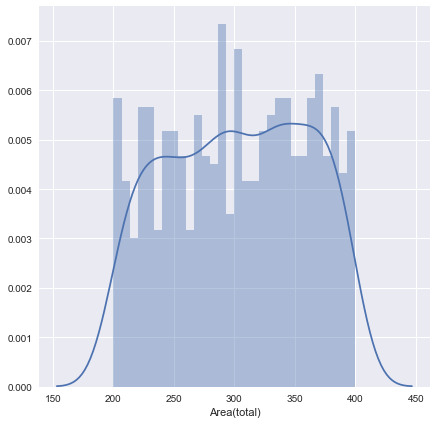

In [30]:
sns.set(rc={'figure.figsize':(7,7)})
sns.distplot(df['Area(total)'], bins=30)
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


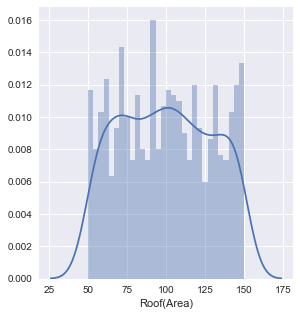

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


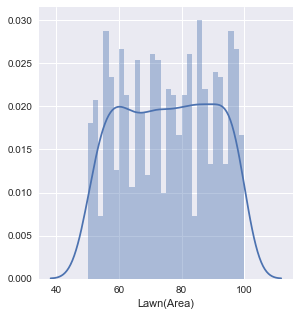

In [44]:
plt.subplot(1,2,1)
sns.distplot(df['Roof(Area)'], bins=30)
plt.show()

plt.subplot(1,2,2)
sns.distplot(df['Lawn(Area)'], bins=30)
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


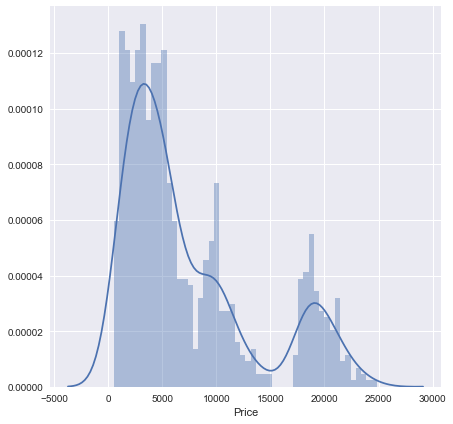

In [31]:
sns.distplot(df['Price'], bins=50)
plt.show()

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


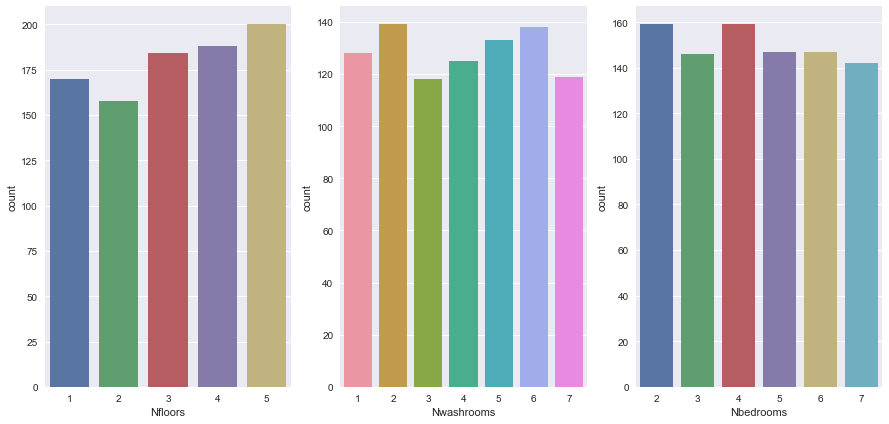

In [34]:
sns.set(rc={'figure.figsize':(15,7)})
plt.subplot(1,3,1)
sns.countplot(df.Nfloors)

plt.subplot(1,3,2)
sns.countplot(df.Nwashrooms)

plt.subplot(1,3,3)
sns.countplot(df.Nbedrooms)

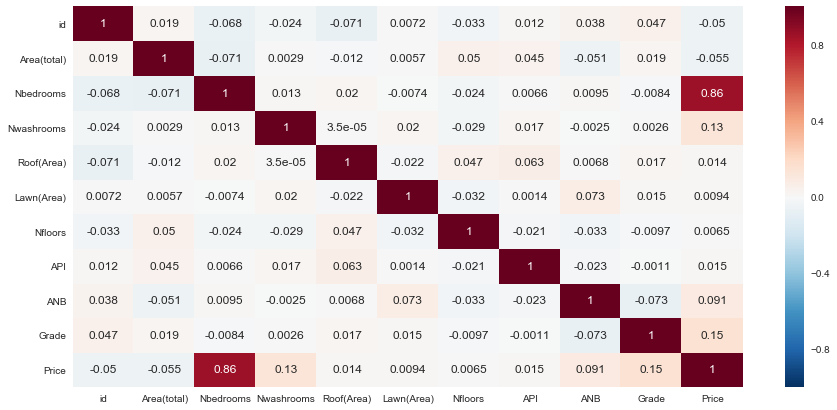

In [47]:
sns.heatmap(df.corr(), annot=True)

No MultiCollinearity (Checked using Durbin Watson in Linear Regression)

In [59]:
np.histogram(df.API)

(array([116,  78, 111,  91, 112,  55,  85,  80,  85,  87], dtype=int64),
 array([60. , 63.5, 67. , 70.5, 74. , 77.5, 81. , 84.5, 88. , 91.5, 95. ]))

## Feature Engineering

In [56]:
df.head()

,id,Area(total),Nbedrooms,Nwashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,Price
0,1,339,4,5,147,62,5,95,3,1,2996
1,2,206,7,6,133,93,1,87,6,1,19918
2,3,323,3,3,145,57,4,76,5,2,1835
3,4,357,6,2,72,96,5,68,6,5,13432
4,5,320,4,7,108,90,3,61,4,3,4584


In [67]:
df["API_binned"] = pd.cut(df.API, bins=7, labels=[7,6,5,4,3,2,1])

In [68]:
df["API_binned"].value_counts()

7    168
5    155
6    137
2    122
3    110
1    105
4    103
Name: API_binned, dtype: int64

In [70]:
df.columns.tolist()

['id',
 'Area(total)',
 'Nbedrooms',
 'Nwashrooms',
 'Roof(Area)',
 'Lawn(Area)',
 'Nfloors',
 'API',
 'ANB',
 'Grade',
 'Price',
 'API_binned']

In [71]:
cat_columns = ['Nbedrooms',
 'Nwashrooms',
 'Nfloors',
 'ANB',
 'Grade',
 'API_binned']

In [72]:
cat_columns

['Nbedrooms', 'Nwashrooms', 'Nfloors', 'ANB', 'Grade', 'API_binned']

In [100]:
for i in cat_columns:
    df[str(i)] = df[str(i)].astype("category")

In [101]:
df.dtypes

id             int64
Area(total)    int64
Nbedrooms      int64
Nwashrooms     int64
Roof(Area)     int64
Lawn(Area)     int64
Nfloors        int64
API            int64
ANB            int64
Grade          int64
Price          int64
API_binned     int64
dtype: object

In [77]:
#One Hot Encoding the dataframe
df_ohe = pd.get_dummies(df)
df_ohe.head()

,id,Area(total),Roof(Area),Lawn(Area),API,Price,Nbedrooms_2,Nbedrooms_3,Nbedrooms_4,Nbedrooms_5,...,Grade_3,Grade_4,Grade_5,API_binned_7,API_binned_6,API_binned_5,API_binned_4,API_binned_3,API_binned_2,API_binned_1
0,1,339,147,62,95,2996,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,206,133,93,87,19918,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,323,145,57,76,1835,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,357,72,96,68,13432,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,5,320,108,90,61,4584,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [78]:
#Shuffling rows
df_ohe = df_ohe.sample(frac = 1)
df_ohe

,id,Area(total),Roof(Area),Lawn(Area),API,Price,Nbedrooms_2,Nbedrooms_3,Nbedrooms_4,Nbedrooms_5,...,Grade_3,Grade_4,Grade_5,API_binned_7,API_binned_6,API_binned_5,API_binned_4,API_binned_3,API_binned_2,API_binned_1
750,751,265,81,97,72,4521,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
871,872,371,99,59,81,1899,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
330,331,259,54,71,70,4419,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
898,899,207,122,53,68,1752,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
304,305,320,62,52,67,2827,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
476,477,367,70,71,76,11015,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
875,876,313,89,94,60,5427,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
198,199,314,86,100,94,2530,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
253,254,368,82,72,76,6416,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
121,122,215,119,89,62,4062,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [80]:
x_ohe = df_ohe.drop(["id","API","Price"], axis = 1)
y_ohe = df_ohe["Price"]

## Modelling

In [103]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ohe, y_ohe, test_size=0.26, random_state=26)

In [85]:
print("Train Shape : ", x_train.shape)
print("Test Shape : ", x_test.shape)

Train Shape :  (666, 39)
Test Shape :  (234, 39)


### SciKit Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [88]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.173362275474092
Mean Squared Error: 13.647108033641727
Root Mean Squared Error: 3.69419924119446


In [89]:
coeff_df = pd.DataFrame(lr.coef_, x_test.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Area(total),1.001760e+00
Roof(Area),9.924385e-01
Lawn(Area),9.954538e-01
Nbedrooms_2,4.865385e+10
Nbedrooms_3,4.865385e+10
Nbedrooms_4,4.865385e+10
Nbedrooms_5,4.865386e+10
Nbedrooms_6,4.865386e+10
Nbedrooms_7,4.865387e+10
Nwashrooms_1,5.480040e+08


In [95]:
pd.DataFrame(y_pred,y_test, columns = ["predictions"])

,predictions
Price,
20045,20045.316437
2827,2824.874390
3946,3947.289978
9853,9856.152588
23299,23301.432617
1348,1354.172302
1667,1664.783264
18831,18825.855774
24851,24854.774811


### Stats Models Linear Regression

In [96]:
import statsmodels.api as sm
x_ohe_sm = x_ohe
x_ohe_sm = sm.add_constant(x_ohe_sm)

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [97]:
model = sm.OLS(y_ohe, x_ohe_sm).fit()
predictions = model.predict(x_ohe_sm) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.969e+07
Date:                Sun, 11 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:44:00   Log-Likelihood:                -2405.8
No. Observations:                 900   AIC:                             4880.
Df Residuals:                     866   BIC:                             5043.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3486.8871      0.498   7007.231   

In [102]:
x_sm = df.drop(["id", "API", "Price"], axis = 1)
y_sm = df.Price
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm).fit()
predictions = model.predict(x_sm) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sun, 11 Aug 2019   Prob (F-statistic):          7.72e-290
Time:                        16:47:27   Log-Likelihood:                -8431.2
No. Observations:                 900   AIC:                         1.688e+04
Df Residuals:                     890   BIC:                         1.693e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.167e+04    948.457    -12.308      

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)
